In [1]:

!pip install qiskit
!pip install qiskit_aer
!pip install qiskit-ibm-runtime
!pip install cirq
!pip install pylatexenc

In [2]:
!pip install qiskit-ibm-runtime

In [3]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.compiler import transpile, assemble
# from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit_ibm_runtime import QiskitRuntimeService
# Loading your IBM Q account(s)
QiskitRuntimeService.save_account(channel="ibm_quantum", token='6af33505cb9a8ba8133690ae424119590cac857ffa29fab8997750494c984679d123e83f4a50587541c11d079396e927221ffe4334391cb07c7ebe16dbdddeb1', overwrite=True)

# Load your saved account
service = QiskitRuntimeService()
#provider = IBMQ.load_account()

In [4]:
import math
import array
import fractions
import numpy as np
import sys

In [5]:
# Function to check if N is power of something
def powerCheck(N):
    b=2
    while (2**b) <= N:
        a = 1
        c = N
        while (c-a) >= 2:
            m = int( (a+c)/2 )
            if (m**b) < (N+1):
                p = int( (m**b) )
            else:
                p = int(N+1)
            if int(p) == int(N):
                print('N is {0}^{1}'.format(int(m),int(b)) )
                return True
            if p<N:
                a = int(m)
            else:
                c = int(m)
        b=b+1

    return False

# Function to get Coprime
def getCoprime(N):

    """ ok defines if user wants to used the suggested a (if ok!='0') or not (if ok=='0') """
    ok='0'

    """ Starting with a=2 """
    a=2

    """ Get the smallest a such that a and N are coprime"""
    while math.gcd(a,N)!=1:
        a=a+1

    """ Store it as the smallest a possible """
    smallest_a = a

    """ Ask user if the a found is ok, if not, then increment and find the next possibility """
    ok = input('Is the number {0} ok for a? Press 0 if not, other number if yes: '.format(a))
    if ok=='0':
        if(N==3):
            print('Number {0} is the only one you can use. Using {1} as value for a\n'.format(a,a))
            return a
        a=a+1

    """ Cycle to find all possibilities for a not counting the smallest one, until user says one of them is ok """
    while ok=='0':

        """ Get a coprime with N """
        while math.gcd(a,N)!=1:
            a=a+1

        """ Ask user if ok """
        ok = input('Is the number {0} ok for a? Press 0 if not, other number if yes: '.format(a))

        """ If user says it is ok, then exit cycle, a has been found """
        if ok!='0':
            break

        """ If user says it is not ok, increment a and check if are all possibilites checked.  """
        a=a+1

        """ If all possibilities for a are rejected, put a as the smallest possible value and exit cycle """
        if a>(N-1):
            print('You rejected all options for value a, selecting the smallest one\n')
            a=smallest_a
            break

    """ Print the value that is used as a """
    print('Using {0} as value for a\n'.format(a))

    return a

""" Function to apply the continued fractions to find r and the gcd to find the desired factors"""
def get_factors(x_value,t_upper,N,a):

    if x_value<=0:
        print('x_value is <= 0, there are no continued fractions\n')
        return False

    print('Running continued fractions for this case\n')

    """ Calculate T and x/T """
    T = pow(2,t_upper)

    x_over_T = x_value/T

    """ Cycle in which each iteration corresponds to putting one more term in the
    calculation of the Continued Fraction (CF) of x/T """

    """ Initialize the first values according to CF rule """
    i=0
    b = array.array('i')
    t = array.array('f')

    b.append(math.floor(x_over_T))
    t.append(x_over_T - b[i])

    while i>=0:

        """From the 2nd iteration onwards, calculate the new terms of the CF based
        on the previous terms as the rule suggests"""

        if i>0:
            b.append( math.floor( 1 / (t[i-1]) ) )
            t.append( ( 1 / (t[i-1]) ) - b[i] )

        """ Calculate the CF using the known terms """

        aux = 0
        j=i
        while j>0:
            aux = 1 / ( b[j] + aux )
            j = j-1

        aux = aux + b[0]

        """Get the denominator from the value obtained"""
        frac = fractions.Fraction(aux).limit_denominator()
        den=frac.denominator

        print('Approximation number {0} of continued fractions:'.format(i+1))
        print("Numerator:{0} \t\t Denominator: {1}\n".format(frac.numerator,frac.denominator))

        """ Increment i for next iteration """
        i=i+1

        if (den%2) == 1:
            if i>=15:
                print('Returning because have already done too much tries')
                return False
            print('Odd denominator, will try next iteration of continued fractions\n')
            continue

        """ If denominator even, try to get factors of N """

        """ Get the exponential a^(r/2) """

        exponential = 0

        if den<1000:
            exponential=pow(a , (den/2))

        """ Check if the value is too big or not """
        if math.isinf(exponential)==1 or exponential>1000000000:
            print('Denominator of continued fraction is too big!\n')
            aux_out = input('Input number 1 if you want to continue searching, other if you do not: ')
            if aux_out != '1':
                return False
            else:
                continue

        """If the value is not to big (infinity), then get the right values and
        do the proper gcd()"""

        putting_plus = int(exponential + 1)

        putting_minus = int(exponential - 1)

        one_factor = math.gcd(putting_plus,N)
        other_factor = math.gcd(putting_minus,N)

        """ Check if the factors found are trivial factors or are the desired
        factors """

        if one_factor==1 or one_factor==N or other_factor==1 or other_factor==N:
            print('Found just trivial factors, not good enough\n')
            """ Check if the number has already been found, use i-1 because i was already incremented """
            if t[i-1]==0:
                print('The continued fractions found exactly x_final/(2^(2n)) , leaving funtion\n')
                return False
            if i<15:
                aux_out = input('Input number 1 if you want to continue searching, other if you do not: ')
                if aux_out != '1':
                    return False
            else:
                """ Return if already too much tries and numbers are huge """
                print('Returning because have already done too many tries\n')
                return False
        else:
            print('The factors of {0} are {1} and {2}\n'.format(N,one_factor,other_factor))
            print('Found the desired factors!\n')
            return True

def egcd(a, b):
    if a == 0:
        return (b, 0, 1)
    else:
        g, y, x = egcd(b % a, a)
        return (g, x - (b // a) * y, y)
def modinv(a, m):
    g, x, y = egcd(a, m)
    if g != 1:
        raise Exception('modular inverse does not exist')
    else:
        return x % m

""" Function to create QFT """
def create_QFT(circuit,up_reg,n,with_swaps):
    i=n-1
    """ Apply the H gates and Cphases"""
    """ The Cphases with |angle| < threshold are not created because they do
    nothing. The threshold is put as being 0 so all CPhases are created,
    but the clause is there so if wanted just need to change the 0 of the
    if-clause to the desired value """
    while i>=0:
        circuit.h(up_reg[i])
        j=i-1
        while j>=0:
            if (np.pi)/(pow(2,(i-j))) > 0:
                circuit.cp( (np.pi)/(pow(2,(i-j))) , up_reg[i] , up_reg[j] )
                j=j-1
        i=i-1

    """ If specified, apply the Swaps at the end """
    if with_swaps==1:
        i=0
        while i < ((n-1)/2):
            circuit.swap(up_reg[i], up_reg[n-1-i])
            i=i+1

""" Function to create inverse QFT """
def create_inverse_QFT(circuit,up_reg,n,with_swaps):
    """ If specified, apply the Swaps at the beggining"""
    if with_swaps==1:
        i=0
        while i < ((n-1)/2):
            circuit.swap(up_reg[i], up_reg[n-1-i])
            i=i+1

    """ Apply the H gates and Cphases"""
    """ The Cphases with |angle| < threshold are not created because they do
    nothing. The threshold is put as being 0 so all CPhases are created,
    but the clause is there so if wanted just need to change the 0 of the
    if-clause to the desired value """
    i=0
    while i<n:
        circuit.h(up_reg[i])
        if i != n-1:
            j=i+1
            y=i
            while y>=0:
                 if (np.pi)/(pow(2,(j-y))) > 0:
                    circuit.cp( - (np.pi)/(pow(2,(j-y))) , up_reg[j] , up_reg[y] )
                    y=y-1
        i=i+1

"""Function that calculates the array of angles to be used in the addition in Fourier Space"""
def getAngles(a,N):
    s=bin(int(a))[2:].zfill(N)
    angles=np.zeros([N])
    for i in range(0, N):
        for j in range(i,N):
            if s[j]=='1':
                angles[N-i-1]+=math.pow(2, -(j-i))
        angles[N-i-1]*=np.pi
    return angles

"""Creation of a doubly controlled phase gate"""
def ccphase(circuit,angle,ctl1,ctl2,tgt):
    circuit.cp(angle/2,ctl1,tgt)
    circuit.cx(ctl2,ctl1)
    circuit.cp(-angle/2,ctl1,tgt)
    circuit.cx(ctl2,ctl1)
    circuit.cp(angle/2,ctl2,tgt)

"""Creation of the circuit that performs addition by a in Fourier Space"""
"""Can also be used for subtraction by setting the parameter inv to a value different from 0"""
def phiADD(circuit,q,a,N,inv):
    angle=getAngles(a,N)
    for i in range(0,N):
        if inv==0:
            circuit.p(angle[i],q[i])
        else:
            circuit.p(-angle[i],q[i])

"""Single controlled version of the phiADD circuit"""
def cphiADD(circuit,q,ctl,a,n,inv):
    angle=getAngles(a,n)
    for i in range(0,n):
        if inv==0:
            circuit.cp(angle[i],ctl,q[i])
        else:
            circuit.cp(-angle[i],ctl,q[i])

"""Doubly controlled version of the phiADD circuit"""
def ccphiADD(circuit,q,ctl1,ctl2,a,n,inv):
    angle=getAngles(a,n)
    for i in range(0,n):
        if inv==0:
            ccphase(circuit,angle[i],ctl1,ctl2,q[i])
        else:
            ccphase(circuit,-angle[i],ctl1,ctl2,q[i])

"""Circuit that implements doubly controlled modular addition by a"""
def ccphiADDmodN(circuit, q, ctl1, ctl2, aux, a, N, n):
    ccphiADD(circuit, q, ctl1, ctl2, a, n, 0)
    phiADD(circuit, q, N, n, 1)
    create_inverse_QFT(circuit, q, n, 0)
    circuit.cx(q[n-1],aux)
    create_QFT(circuit,q,n,0)
    cphiADD(circuit, q, aux, N, n, 0)

    ccphiADD(circuit, q, ctl1, ctl2, a, n, 1)
    create_inverse_QFT(circuit, q, n, 0)
    circuit.x(q[n-1])
    circuit.cx(q[n-1], aux)
    circuit.x(q[n-1])
    create_QFT(circuit,q,n,0)
    ccphiADD(circuit, q, ctl1, ctl2, a, n, 0)

"""Circuit that implements the inverse of doubly controlled modular addition by a"""
def ccphiADDmodN_inv(circuit, q, ctl1, ctl2, aux, a, N, n):
    ccphiADD(circuit, q, ctl1, ctl2, a, n, 1)
    create_inverse_QFT(circuit, q, n, 0)
    circuit.x(q[n-1])
    circuit.cx(q[n-1],aux)
    circuit.x(q[n-1])
    create_QFT(circuit, q, n, 0)
    ccphiADD(circuit, q, ctl1, ctl2, a, n, 0)
    cphiADD(circuit, q, aux, N, n, 1)
    create_inverse_QFT(circuit, q, n, 0)
    circuit.cx(q[n-1], aux)
    create_QFT(circuit, q, n, 0)
    phiADD(circuit, q, N, n, 0)
    ccphiADD(circuit, q, ctl1, ctl2, a, n, 1)

"""Circuit that implements single controlled modular multiplication by a"""
def cMULTmodN(circuit, ctl, q, aux, a, N, n):
    create_QFT(circuit,aux,n+1,0)
    for i in range(0, n):
        ccphiADDmodN(circuit, aux, q[i], ctl, aux[n+1], (2**i)*a % N, N, n+1)
    create_inverse_QFT(circuit, aux, n+1, 0)

    for i in range(0, n):
        circuit.cswap(ctl,q[i],aux[i])

    a_inv = modinv(a, N)
    create_QFT(circuit, aux, n+1, 0)
    i = n-1
    while i >= 0:
        ccphiADDmodN_inv(circuit, aux, q[i], ctl, aux[n+1], math.pow(2,i)*a_inv % N, N, n+1)
        i -= 1
    create_inverse_QFT(circuit, aux, n+1, 0)

In [6]:
# simulation code with timing:
import time
from qiskit_aer import AerSimulator

if __name__ == '__main__':

    """ Ask for analysis number N """
    N = int(input('Please insert integer number N: '))
    print('input number was: {0}\n'.format(N))

    """ Check if N==1 or N==0"""
    if N == 1 or N == 0:
       print('Please put an N different from 0 and from 1')
       exit()

    """ Check if N is even """
    if (N % 2) == 0:
        print('N is even, so does not make sense!')
        exit()

    """ Check if N can be put in N=p^q, p>1, q>=2 """
    if powerCheck(N) == True:
       exit()

    print('Not an easy case, using the quantum circuit is necessary\n')
    a = getCoprime(N)
    print(a)

    n = math.ceil(math.log(N, 2))
    print('Total number of qubits used: {0}\n'.format(4 * n + 2))

    aux = QuantumRegister(n + 2)
    up_reg = QuantumRegister(2 * n)
    down_reg = QuantumRegister(n)
    up_classic = ClassicalRegister(2 * n)
    circuit = QuantumCircuit(down_reg, up_reg, aux, up_classic)

    circuit.h(up_reg)
    circuit.x(down_reg[0])

    for i in range(0, 2 * n):
        cMULTmodN(circuit, up_reg[i], down_reg, aux, int(pow(a, pow(2, i))), N, n)

    create_inverse_QFT(circuit, up_reg, 2 * n, 1)
    circuit.measure(up_reg, up_classic)

    number_shots = int(input('Number of times to run the circuit: '))
    if number_shots < 1:
        print('Please run the circuit at least one time...')
        exit()
    elif number_shots > 1:
        print('\nIf the circuit takes too long to run, consider running it less times\n')

    print('Executing the circuit {0} times for N={1} and a={2}\n'.format(number_shots, N, a))

    # Start timing the simulation
    start_time = time.time()

    simulator = AerSimulator()
    transpiled_circuit = transpile(circuit, simulator)
    job = simulator.run(transpiled_circuit, shots=number_shots)
    sim_result = job.result()
    counts_result = sim_result.get_counts(transpiled_circuit)

    # End timing and calculate duration
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Time taken to find the factors: {elapsed_time:.4f} seconds")

    print('Printing the various results followed by how many times they happened (out of the {} cases):\n'.format(number_shots))
    i = 0
    while i < len(counts_result):
        print('Result \"{0}\" happened {1} times out of {2}'.format(list(sim_result.get_counts().keys())[i], list(sim_result.get_counts().values())[i], number_shots))
        i = i + 1

    prob_success = 0
    i = 0
    while i < len(counts_result):
        output_desired = list(sim_result.get_counts().keys())[i]
        x_value = int(output_desired, 2)
        prob_this_result = 100 * (int(list(sim_result.get_counts().values())[i])) / number_shots

        print("------> Analysing result {0}. This result happened in {1:.4f} % of all cases\n".format(output_desired, prob_this_result))
        print('In decimal, x_final value for this result is: {0}\n'.format(x_value))

        success = get_factors(int(x_value), int(2 * n), int(N), int(a))
        if success == True:
            prob_success += prob_this_result

        i = i + 1

    print("\nUsing a={0}, found the factors of N={1} in {2:.4f} % of the cases\n".format(a, N, prob_success))

input number was: 15

Not an easy case, using the quantum circuit is necessary

Using 4 as value for a

4
Total number of qubits used: 18


If the circuit takes too long to run, consider running it less times

Executing the circuit 128 times for N=15 and a=4

Time taken to find the factors: 2.6666 seconds
Printing the various results followed by how many times they happened (out of the 128 cases):

Result "10000000" happened 65 times out of 128
Result "00000000" happened 63 times out of 128
------> Analysing result 10000000. This result happened in 50.7812 % of all cases

In decimal, x_final value for this result is: 128

Running continued fractions for this case

Approximation number 1 of continued fractions:
Numerator:0 		 Denominator: 1

Odd denominator, will try next iteration of continued fractions

Approximation number 2 of continued fractions:
Numerator:1 		 Denominator: 2

The factors of 15 are 5 and 3

Found the desired factors!

------> Analysing result 00000000. This result 

In [50]:
# using the IBM computer: 
import time
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler

if __name__ == '__main__':
    
    """ Ask for analysis number N """   
    N = int(input('Please insert integer number N: '))
    print('input number was: {0}\n'.format(N))
    
    if N == 1 or N == 0: 
       print('Please put an N different from 0 and from 1')
       exit()
    
    if (N % 2) == 0:
        print('N is even, so does not make sense!')
        exit()
    
    if powerCheck(N) == True:
       exit()

    print('Not an easy case, using the quantum circuit is necessary\n')
    a = getCoprime(N)
    print(a)

    n = math.ceil(math.log(N, 2))
    print('Total number of qubits used: {0}\n'.format(4 * n + 2))

    aux = QuantumRegister(n + 2)
    up_reg = QuantumRegister(2 * n)
    down_reg = QuantumRegister(n)
    up_classic = ClassicalRegister(2 * n)
    circuit = QuantumCircuit(down_reg, up_reg, aux, up_classic)

    circuit.h(up_reg)
    circuit.x(down_reg[0])

    for i in range(0, 2 * n):
        cMULTmodN(circuit, up_reg[i], down_reg, aux, int(pow(a, pow(2, i))), N, n)

    create_inverse_QFT(circuit, up_reg, 2 * n, 1)
    circuit.measure(up_reg, up_classic)

    number_shots = int(input('Number of times to run the circuit: '))
    if number_shots < 1:
        print('Please run the circuit at least one time...')
        exit()
    elif number_shots > 1:
        print('\nIf the circuit takes too long to run, consider running it less times\n')

    print('Executing the circuit {0} times for N={1} and a={2}\n'.format(number_shots, N, a))

    # Initialize Qiskit Runtime Service
    service = QiskitRuntimeService()
    backend = service.least_busy(operational=True, simulator=False, min_num_qubits=n)
    
    # Transpile the circuit for the selected backend
    transpiled_circuit = transpile(circuit, backend)
    sampler = Sampler(mode=backend)

    # Start timing the job execution
    start_time = time.time()

    job = sampler.run([transpiled_circuit], shots=number_shots)

    # Get the result and calculate elapsed time
    sim_result = job.result()
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Time taken to find the factors on IBM Quantum backend: {elapsed_time:.4f} seconds")

input number was: 33

Not an easy case, using the quantum circuit is necessary

Using 5 as value for a

5
Total number of qubits used: 26


If the circuit takes too long to run, consider running it less times

Executing the circuit 128 times for N=33 and a=5



KeyboardInterrupt: 

In [45]:
token = '6af33505cb9a8ba8133690ae424119590cac857ffa29fab8997750494c984679d123e83f4a50587541c11d079396e927221ffe4334391cb07c7ebe16dbdddeb1'

In [53]:
circuit.cregs

[ClassicalRegister(12, 'c14')]

In [ ]:
import os
from typing import Counter
from qiskit_ibm_runtime import QiskitRuntimeService


# Initialize the Qiskit Runtime Service
service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token=token
)

# Retrieve the job result
job_id = 'cwh4jzv0r6b0008pk8pg'
job = service.job(job_id)
job_result = job.result()

# Use the classical register name 'c13' to access the counts
classical_register_name = 'c14'  # Name of the classical register as given by `circuit.cregs`

# Access the counts through the specified pub result and classical register name
counts_result = job_result[0].data['c14'].get_counts()

print('Printing the various results followed by how many times they happened:\n')
for result, count in counts_result.items():
    print(f'Result "{result}" happened {count} times')

# Assuming `number_shots`, `n`, `N`, and `a` are already defined
prob_success = 0
for result, count in counts_result.items():
    x_value = int(result, 2)  # Convert bitstring result to integer
    prob_this_result = 100 * count / number_shots  # Calculate percentage
    print(f"------> Analysing result {result}. This result happened in {prob_this_result:.4f}% of all cases")
    print(f'In decimal, x_final value for this result is: {x_value}')

    # Run the factorization analysis function
    success = get_factors(x_value, int(2 * n), int(N), int(a))
    if success:
        prob_success += prob_this_result

print(f"\nUsing a={a}, found the factors of N={N} in {prob_success:.4f}% of the cases\n")

In [18]:
print(circuit)

      ┌───┐                                                                 »
q3_0: ┤ X ├─────────────────────────────────────────────────────────────────»
      └───┘                                                                 »
q3_1: ──────────────────────────────────────────────────────────────────────»
                                                                            »
q3_2: ──────────────────────────────────────────────────────────────────────»
                                                                            »
q3_3: ──────────────────────────────────────────────────────────────────────»
      ┌───┐                                                                 »
q2_0: ┤ H ├─────────────────────────────────────────────────────────────────»
      ├───┤                                                                 »
q2_1: ┤ H ├─────────────────────────────────────────────────────────────────»
      ├───┤                                                     

In [13]:
#circuit.draw()
%circuit_library_info circuit

UsageError: Line magic function `%circuit_library_info` not found.


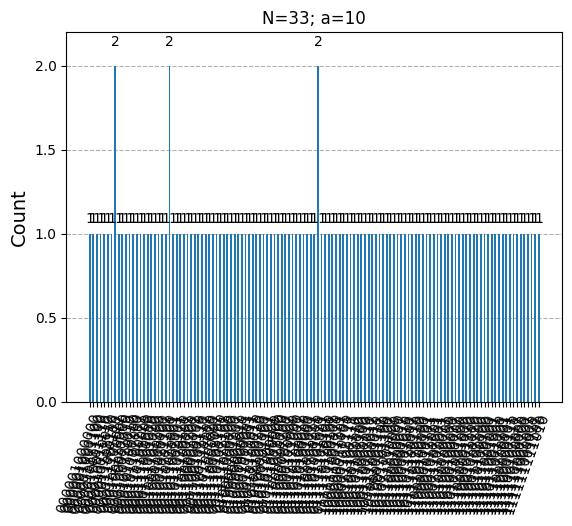

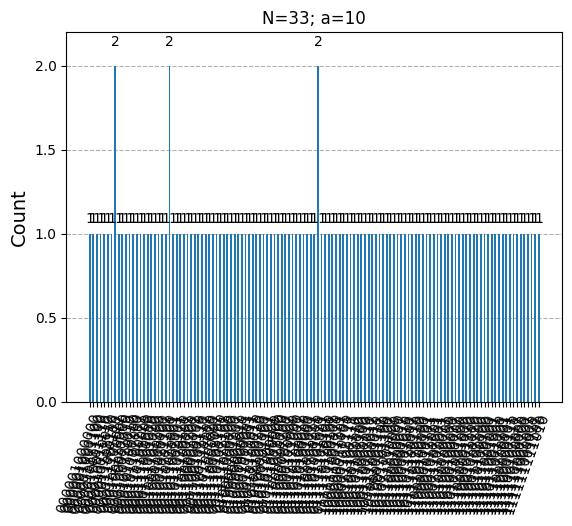

In [49]:
plot_histogram(counts_result, title="N=33; a=10")

In [ ]:
#looking for backends
for backend in provider.backends():
    print(backend.status())

BackendStatus(backend_name='ibmq_qasm_simulator', backend_version='0.1.547', operational=True, pending_jobs=1, status_msg='active')
BackendStatus(backend_name='ibmqx2', backend_version='2.0.5', operational=True, pending_jobs=0, status_msg='active')
BackendStatus(backend_name='ibmq_16_melbourne', backend_version='2.1.0', operational=True, pending_jobs=9, status_msg='active')
BackendStatus(backend_name='ibmq_vigo', backend_version='1.0.2', operational=True, pending_jobs=2, status_msg='active')
BackendStatus(backend_name='ibmq_ourense', backend_version='1.0.1', operational=True, pending_jobs=2, status_msg='active')
BackendStatus(backend_name='ibmq_london', backend_version='1.1.0', operational=True, pending_jobs=2, status_msg='active')
BackendStatus(backend_name='ibmq_burlington', backend_version='1.1.4', operational=True, pending_jobs=3, status_msg='active')
BackendStatus(backend_name='ibmq_essex', backend_version='1.0.1', operational=True, pending_jobs=2, status_msg='active')
BackendStat